# INTERNAL DATASET

### Definición General

Este dataset contiene recuperación de los registros relacionados con los préstamos de un individuo proporcionados por el Credit Information Bureau (India) Limited (CIBIL), recopilados por un banco. Este dataset contiene información interna detallada acerca de los préstamos, su estado, antigüedad y el comportamiento de los pagos, que son fundamentales para evaluar el riesgo crediticio de los clientes. Las variables incluidas en este conjunto de datos se enfocan en el análisis de líneas de crédito, cuentas comerciales y el estado de los préstamos a lo largo del tiempo.

Las siguientes variables corresponden a datos bancarios internos utilizados en el análisis de líneas de crédito y cuentas comerciales. Se incluyen métricas relacionadas con la cantidad, antigüedad y estado de las cuentas en diferentes periodos de tiempo.

### Variables y Descripciones

- **PROPECTID**: Identificador único asignado a cada cliente.

- **Total_TL**: Representa el número total de líneas comerciales o cuentas en la oficina de crédito.

- **Tot_Closed_TL**: Cantidad total de cuentas o líneas comerciales que han sido cerradas.

- **Tot_Active_TL**: Número total de cuentas activas en el sistema.

- **Total_TL_opened_L6M**: Total de cuentas que han sido abiertas en los últimos 6 meses.

- **Tot_TL_closed_L6M**: Total de cuentas que han sido cerradas en los últimos 6 meses.

- **pct_tl_open_L6M**: Porcentaje de cuentas abiertas en los últimos 6 meses respecto al total de cuentas.

- **pct_tl_closed_L6M**: Porcentaje de cuentas cerradas en los últimos 6 meses respecto al total de cuentas.

- **pct_active_tl**: Proporción de cuentas activas en relación con el total de cuentas.

- **pct_closed_tl**: Proporción de cuentas cerradas en relación con el total de cuentas.

- **Total_TL_opened_L12M**: Total de cuentas abiertas en los últimos 12 meses.

- **Tot_TL_closed_L12M**: Total de cuentas cerradas en los últimos 12 meses.

- **pct_tl_open_L12M**: Porcentaje de cuentas abiertas en los últimos 12 meses respecto al total de cuentas.

- **pct_tl_closed_L12M**: Porcentaje de cuentas cerradas en los últimos 12 meses respecto al total de cuentas.

- **Tot_Missed_Pmnt**: Cantidad total de pagos atrasados o incumplidos en las cuentas registradas.

- **Auto_TL**: Recuento del número de cuentas de préstamos para automóviles.

- **CC_TL**: Número de cuentas de tarjetas de crédito.

- **Consumer_TL**: Número de cuentas asociadas a bienes de consumo.

- **Gold_TL**: Cantidad de cuentas de préstamos respaldados por oro.

- **Home_TL**: Número de cuentas de préstamos hipotecarios o para vivienda.

- **PL_TL**: Cantidad de cuentas de préstamos personales.

- **Secured_TL**: Total de cuentas que están garantizadas por algún tipo de colateral.

- **Unsecured_TL**: Número de cuentas que no cuentan con garantías asociadas.

- **Other_TL**: Recuento de otras cuentas que no entran en las categorías específicas.

- **Age_Oldest_TL**: Antigüedad de la cuenta más antigua registrada.

- **Age_Newest_TL**: Antigüedad de la cuenta más reciente registrada.

In [1]:
# 1. Importaciones estándar de Python
import os
import joblib

# 2. Librerías de terceros
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import pickle

# 3. Importaciones específicas de librerías
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import  PowerTransformer, MinMaxScaler

# 4. Importaciones locales (módulos del proyecto)
from modulos.data_description import *
from modulos.data_model import *
from modulos.data_visualization import *

# 5. Configuración adicional
pd.set_option('display.max_columns', None)
np.random.seed(29)

## 1. Carga de datos

In [2]:
# Cargamos el dataset
ruta_binario = os.path.join('data', 'Internal_Bank_Dataset.pkl')
internal = joblib.load(ruta_binario)

# Remplazamos el valor asignado como nulo para que no afecta al EDA
internal.replace(-99999, np.nan, inplace=True)

In [3]:
# Visualizamos 5 primeras y 5 últimas líneas del dataframe
print(head_tail(internal, 5))
print('-' * 50)

# Resumen estadístico de los datos numéricos
print(internal.describe())

   PROSPECTID Total_TL Tot_Closed_TL Tot_Active_TL Total_TL_opened_L6M  \
0           1        5             4             1                   0   
1           2        1             0             1                   0   
2           3        8             0             8                   1   
3           4        1             0             1                   1   
4           5        3             2             1                   0   
5         ...      ...           ...           ...                 ...   
6       51332        3             0             3                   1   
7       51333        4             2             2                   0   
8       51334        2             1             1                   1   
9       51335        2             1             1                   0   
10      51336        1             0             1                   0   

   Tot_TL_closed_L6M pct_tl_open_L6M pct_tl_closed_L6M pct_active_tl  \
0                  0             0.0   

In [4]:
# Función que muestra la estructura de cada variable
for col in internal.columns.tolist():
    describe_columna(internal, col)

Columna: PROSPECTID  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 51336
Valores más frecuentes:
51336 	 1
1 	 1
2 	 1
3 	 1
4 	 1
5 	 1
6 	 1
7 	 1
51320 	 1
51319 	 1
Columna: Total_TL  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 107
Valores más frecuentes:
1 	 16550
2 	 9269
3 	 5867
4 	 4027
5 	 2872
6 	 2267
7 	 1678
8 	 1321
9 	 1083
10 	 815
Columna: Tot_Closed_TL  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 100
Valores más frecuentes:
0 	 18377
1 	 13055
2 	 5914
3 	 3334
4 	 2250
5 	 1613
6 	 1161
7 	 928
8 	 654
9 	 546
Columna: Tot_Active_TL  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 32
Valores más frecuentes:
1 	 19163
2 	 9640
0 	 8519
3 	 5263
4 	 3091
5 	 1877
6 	 1247
7 	 795
8 	 543
9 	 385
Columna: Total_TL_opened_L6M  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 20
Valore

### 1.1. Obtención variable objetivo

In [5]:
# Cargamos el dataset external
ruta_binario = os.path.join('data', 'external_Cibil_Dataset.pkl')
external = joblib.load(ruta_binario)

# Remplazamos el valor asignado como nulo para que no afecta al EDA
internal.replace(-99999, np.nan, inplace=True)

In [6]:
# Extraemos la columna 'Credit_Score' del dataset external
internal = pd.merge(internal, external, on='PROSPECTID', how='inner',)[internal.columns.tolist() + ['Credit_Score']]

## 2. Calidad del Dato

### 2.1. Valores Nulos

Mostrar cuántos valores nulos hay por columna y su porcentaje

In [7]:
# Contamos la cantidad de valores nulos por columna
q_nulos = internal.isnull().sum()

# Filtramos solo las columnas que tienen valores nulos
q_nulos = q_nulos[q_nulos > 0]

# Calculamos el porcentaje de valores nulos respecto al total de filas
p_nulos = (q_nulos / len(internal) * 100).round(2)

# Creamos un DataFrame con la cantidad y el porcentaje de valores nulos
df_nulos = pd.DataFrame({
    'Cantidad': q_nulos,
    'Porcentaje': p_nulos
}).sort_values(by='Cantidad', ascending=False)

# Imprimimos el DataFrame resultante
print(df_nulos)

               Cantidad  Porcentaje
Age_Oldest_TL        40        0.08
Age_Newest_TL        40        0.08


La cantidad de valores nulos en cada columna es exactamente la misma por lo que vamos a estudiar si corresponde a las mismas observaciones

In [8]:
# Identificamos las filas donde 'Age_Newest_TL' es nulo
x = internal['Age_Newest_TL'].isnull()

# Identificamos las filas donde 'Age_Oldest_TL' es nulo
y = internal['Age_Oldest_TL'].isnull()

# Verificamos si las mismas filas tienen valores nulos en ambas columnas
if (x == y).all():
    print("Las mismas filas tienen valores nulos en ambas columnas.")

# Mostramos estadísticas descriptivas de las filas donde 'Age_Newest_TL' es nulo
internal.loc[x, :].describe()

Las mismas filas tienen valores nulos en ambas columnas.


PROSPECTID   Total_TL  Tot_Closed_TL  Tot_Active_TL  \
count     40.000000  40.000000      40.000000      40.000000   
mean   25573.150000   1.175000       0.325000       0.850000   
std    14955.318206   0.812956       1.022503       0.426675   
min      533.000000   1.000000       0.000000       0.000000   
25%    12363.750000   1.000000       0.000000       1.000000   
50%    27362.500000   1.000000       0.000000       1.000000   
75%    37006.750000   1.000000       0.000000       1.000000   
max    50805.000000   6.000000       6.000000       2.000000   

       Total_TL_opened_L6M  Tot_TL_closed_L6M  pct_tl_open_L6M  \
count                 40.0               40.0             40.0   
mean                   0.0                0.0              0.0   
std                    0.0                0.0              0.0   
min                    0.0                0.0              0.0   
25%                    0.0                0.0              0.0   
50%                    0.0                0.0              0.0   
75%                    0.0                0.0              0.0   
max                    0.0                0.0              0.0   

       pct_tl_closed_L6M  pct_active_tl  pct_closed_tl  Total_TL_opened_L12M  \
count               40.0      40.000000      40.000000                  40.0   
mean                 0.0       0.825000       0.175000                   0.0   
std                  0.0       0.384808       0.384808                   0.0   
min                  0.0       0.000000       0.000000                   0.0   
25%                  0.0       1.000000       0.000000                   0.0   
50%                  0.0       1.000000       0.000000                   0.0   
75%                  0.0       1.000000       0.000000                   0.0   
max                  0.0       1.000000       1.000000                   0.0   

       Tot_TL_closed_L12M  pct_tl_open_L12M  pct_tl_closed_L12M  \
count                40.0              40.0                40.0   
mean                  0.0               0.0                 0.0   
std                   0.0               0.0                 0.0   
min                   0.0               0.0                 0.0   
25%                   0.0               0.0                 0.0   
50%                   0.0               0.0                 0.0   
75%                   0.0               0.0                 0.0   
max                   0.0               0.0                 0.0   

       Tot_Missed_Pmnt    Auto_TL  CC_TL  Consumer_TL    Gold_TL    Home_TL  \
count        40.000000  40.000000   40.0         40.0  40.000000  40.000000   
mean          0.550000   0.025000    0.0          0.0   0.025000   0.025000   
std           0.503831   0.158114    0.0          0.0   0.158114   0.158114   
min           0.000000   0.000000    0.0          0.0   0.000000   0.000000   
25%           0.000000   0.000000    0.0          0.0   0.000000   0.000000   
50%           1.000000   0.000000    0.0          0.0   0.000000   0.000000   
75%           1.000000   0.000000    0.0          0.0   0.000000   0.000000   
max           1.000000   1.000000    0.0          0.0   1.000000   1.000000   

           PL_TL  Secured_TL  Unsecured_TL   Other_TL  Age_Oldest_TL  \
count  40.000000   40.000000     40.000000  40.000000            0.0   
mean    0.025000    0.475000      0.700000   1.075000            NaN   
std     0.158114    1.061868      0.464095   0.888314            NaN   
min     0.000000    0.000000      0.000000   0.000000            NaN   
25%     0.000000    0.000000      0.000000   1.000000            NaN   
50%     0.000000    0.000000      1.000000   1.000000            NaN   
75%     0.000000    1.000000      1.000000   1.000000            NaN   
max     1.000000    6.000000      1.000000   6.000000            NaN   

       Age_Newest_TL  Credit_Score  
count            0.0     40.000000  
mean             NaN    683.750000  
std              NaN     10.357086  
min

Examinando los aspectos descriptivos de la variable, se deduce que son clientes sin apenas actividad. Debido a la insignificancia con respecto al resto de asignaciones, se realiza una asignación de los valores respetando la distribución de la variable.

In [9]:
# Imputa los valores nulos en 'Age_Oldest_TL' seleccionando aleatoriamente valores existentes de la misma columna
internal.loc[
    internal['Age_Oldest_TL'].isnull(), 'Age_Oldest_TL'
] = np.random.choice(internal['Age_Oldest_TL'].dropna(), size=internal['Age_Oldest_TL'].isnull().sum())

# Imputa los valores nulos en 'Age_Newest_TL' seleccionando aleatoriamente valores existentes de la misma columna
internal.loc[
    internal['Age_Newest_TL'].isnull(), 'Age_Newest_TL'
] = np.random.choice(internal['Age_Newest_TL'].dropna(), size=internal['Age_Newest_TL'].isnull().sum())


### 2.2. Agregación de Características

Vamos a realizar una agregación de variables que representan una misma característica en diferentes límites temporales utilizando un modelo PCA (Análisis de Componentes Principales). Optamos por PCA en lugar de la media ponderada debido a que existe una correlación significativa entre las variables, lo que puede introducir sesgos si se utilizan pesos arbitrarios. Además, PCA captura de manera eficiente la variabilidad temporal de los datos, lo que nos permitirá reducir la dimensionalidad sin perder la información relevante. Esto facilitará la interpretación y mejorará el rendimiento del modelo.

In [10]:
# Definir las nuevas columnas y sus variables correspondientes
pca_columns = {
    'Total_TL_opened_pca': ['Total_TL_opened_L6M', 'Total_TL_opened_L12M'],
    'Tot_TL_closed_pca': ['Tot_TL_closed_L6M', 'Tot_TL_closed_L12M'],
    'pct_tl_open_pca': ['pct_tl_open_L6M', 'pct_tl_open_L12M'],
    'pct_tl_closed_pca': ['pct_tl_closed_L6M', 'pct_tl_closed_L12M']
}

# Aplicar PCA para cada conjunto de variables en el diccionario
for new_col, variables in pca_columns.items():
    internal[new_col] = agregacion_pca(internal, 1, *variables)
    internal.drop(columns=variables, inplace=True)

### 2.3. Outliers

#### 2.3.1. Descripción Outliers

In [11]:
# Creamos una variable con las variables numéricas
numeric_features = internal.drop(['PROSPECTID', 'Credit_Score'], axis=1).columns


In [12]:
# Cuantificamos outliers
count_outliers_iqr(internal, numeric_features)

Recuento de outliers por feature:
Total_TL: 4865
Tot_Closed_TL: 4704
Tot_Active_TL: 2536
Tot_Missed_Pmnt: 2373
Auto_TL: 1701
CC_TL: 4593
Consumer_TL: 6961
Gold_TL: 7472
Home_TL: 2715
PL_TL: 8618
Secured_TL: 4511
Unsecured_TL: 4687
Other_TL: 6072
Age_Oldest_TL: 2266
Age_Newest_TL: 5759
Total_TL_opened_pca: 3129
Tot_TL_closed_pca: 2412
pct_tl_closed_pca: 5341


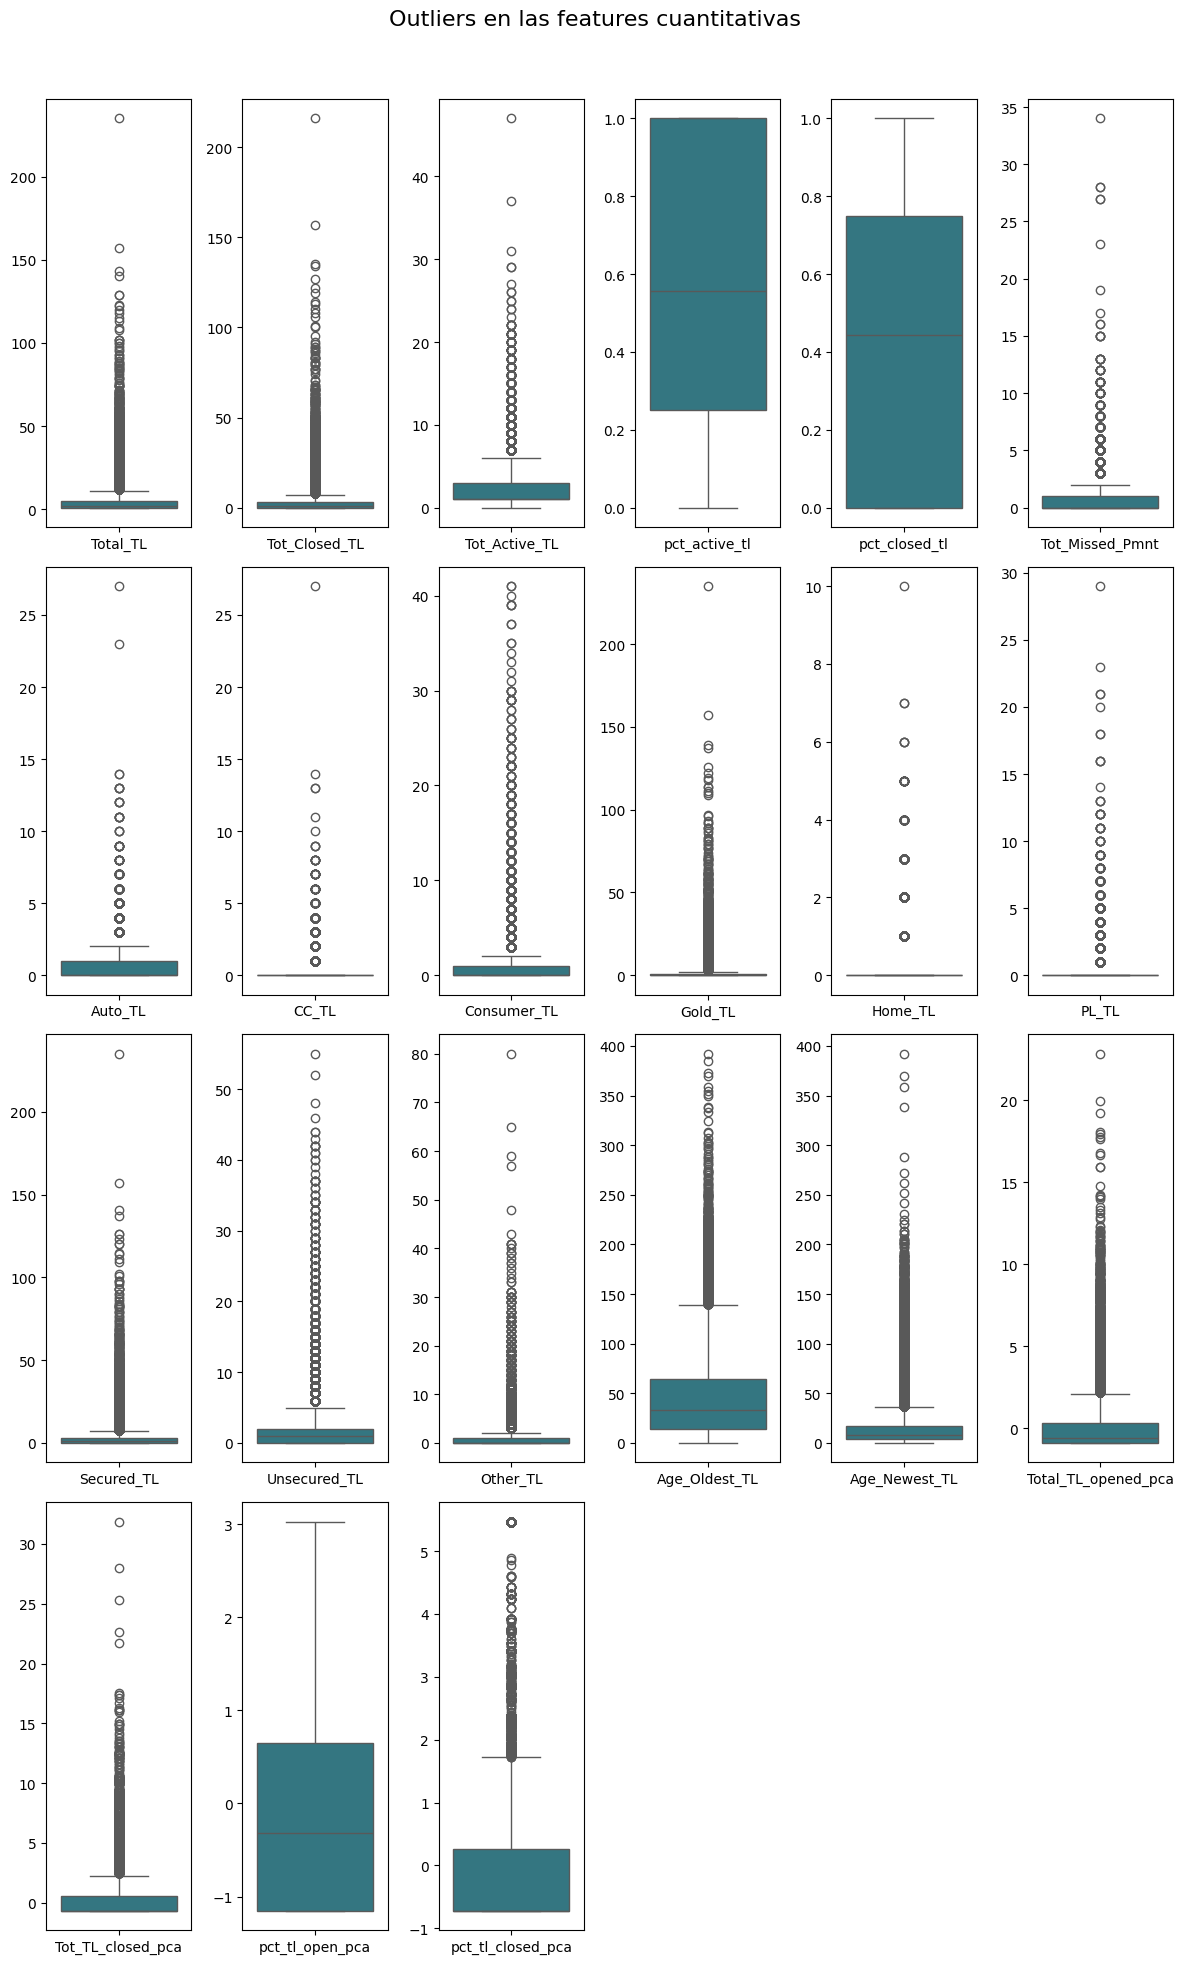

In [13]:
# Grafica outliers tipo box-plot por  variable
plot_outliers_boxplots(internal, numeric_features, 4, 6)

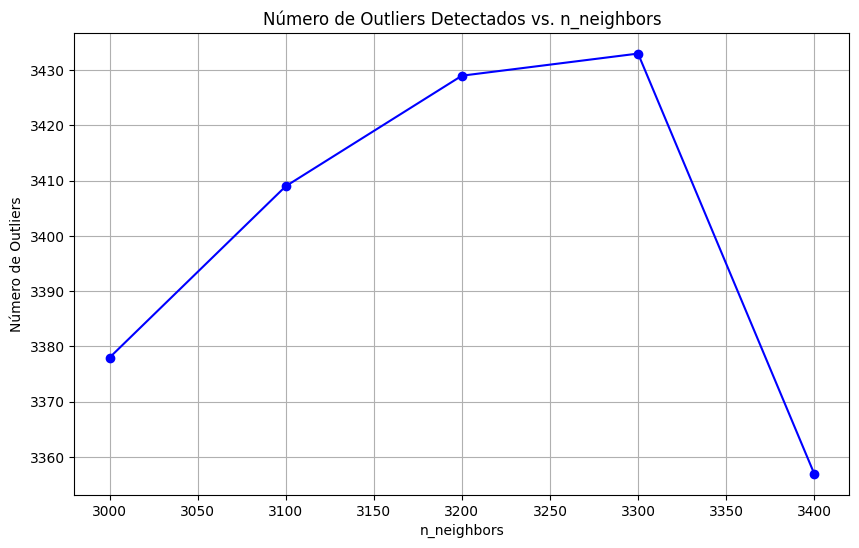

n_neighbors=3000 -> Número de outliers: 3378
n_neighbors=3100 -> Número de outliers: 3409
n_neighbors=3200 -> Número de outliers: 3429
n_neighbors=3300 -> Número de outliers: 3433
n_neighbors=3400 -> Número de outliers: 3357
El valor de n_neighbors con el máximo número de outliers (3433) es: 3300


In [14]:
# Rango de valores para n_neighbors
neighbors_range = range(3000,3401, 100)
outlier_counts = []

# Evaluar LOF para diferentes valores de n_neighbors
for n in neighbors_range:
    lof = LocalOutlierFactor(n_neighbors=n)
    y_pred = lof.fit_predict(internal[numeric_features])
    outliers = np.where(y_pred == -1)[0]
    outlier_counts.append(len(outliers))

# Graficar el número de outliers detectados en función de n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, outlier_counts, marker='o', linestyle='-', color='b')
plt.title('Número de Outliers Detectados vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Número de Outliers')
plt.grid(True)
plt.show()

# Crear un diccionario para almacenar los valores de n_neighbors y sus correspondientes outliers
outliers_dict = {}

# Imprimir la cantidad de outliers detectados para cada valor de n_neighbors
for n, count in zip(neighbors_range, outlier_counts):
    print(f'n_neighbors={n} -> Número de outliers: {count}')
    outliers_dict[n] = count  # Agregar el valor de n y su count al diccionario

# Encontrar el valor de n_neighbors donde el count es máximo
max_n = max(outliers_dict, key=outliers_dict.get)  # Este es el n_neighbors con el máximo count
max_count = outliers_dict[max_n]  # Este es el valor de count correspondiente

# Imprimir el resultado
print(f'El valor de n_neighbors con el máximo número de outliers ({max_count}) es: {max_n}')

# Crear el modelo LOF con el valor de n_neighbors donde count es máximo
lof = LocalOutlierFactor(n_neighbors=max_n)

# Ajustar el modelo y predecir
y_pred = lof.fit_predict(internal[numeric_features])

# Obtener los índices de los outliers
outliers = np.where(y_pred == -1)[0]  # Selecciona solo la primera parte de la tupla

# Filtrar los valores atípicos en el DataFrame
outlier_values = internal.iloc[outliers]

Hay una alta proporción de outliers por lo que procedemos con su tratamiento para intentar reducirlos.

#### 2.3.2. Transformación de las distribuciones

In [ ]:
# Inicializar listas para variables transformadas
log_transformed = []
yeo_johnson_transformed = []

# Iterar sobre las características numéricas
for col in numeric_features:
    series = internal[col]
    
    # Si la asimetría es mayor que 1.5, aplicar transformación logarítmica
    if skew(series) > 1.5:
        internal[col] = np.log1p(series)
        log_transformed.append(col)
    
    # Para el resto, aplicar transformación Yeo-Johnson
    else:
        yeo_johnson = PowerTransformer(method='yeo-johnson')
        internal[col] = yeo_johnson.fit_transform(series.values.reshape(-1, 1)).flatten()
        yeo_johnson_transformed.append(col)

# Imprimir las listas de variables transformadas
print(f'Variables transformadas con logaritmo: {log_transformed}')
print(f'Variables transformadas con Yeo-Johnson: {yeo_johnson_transformed}')

Variables transformadas con logaritmo: ['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL', 'Total_TL_opened_pca', 'Tot_TL_closed_pca', 'pct_tl_closed_pca']
Variables transformadas con Yeo-Johnson: ['pct_active_tl', 'pct_closed_tl', 'pct_tl_open_pca']


In [16]:
# Cuantificamos outliers
count_outliers_iqr(internal, numeric_features)

Recuento de outliers por feature:
Total_TL: 696
Tot_Closed_TL: 400
Tot_Active_TL: 587
Tot_Missed_Pmnt: 566
Auto_TL: 281
CC_TL: 4593
Consumer_TL: 2908
Gold_TL: 4903
Home_TL: 2715
PL_TL: 8618
Secured_TL: 467
Unsecured_TL: 594
Other_TL: 2708
Age_Oldest_TL: 21
Age_Newest_TL: 356
Tot_TL_closed_pca: 22


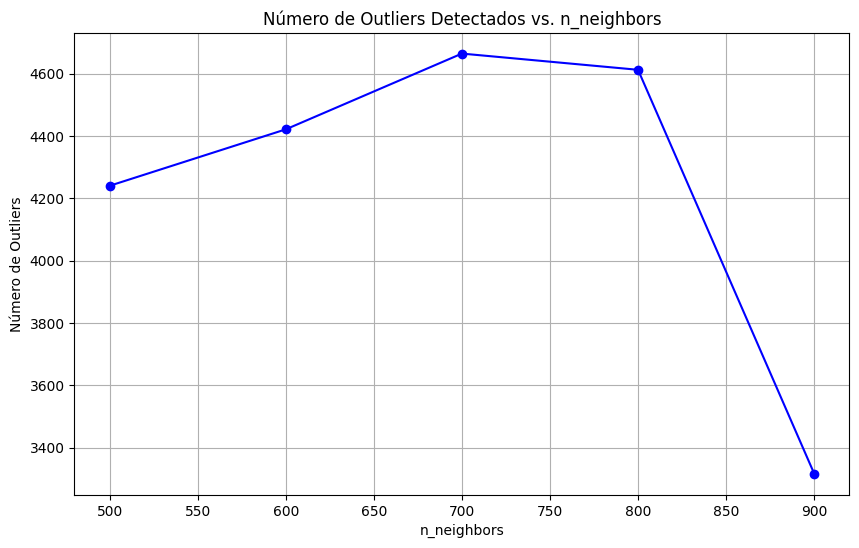

n_neighbors=500 -> Número de outliers: 4240
n_neighbors=600 -> Número de outliers: 4421
n_neighbors=700 -> Número de outliers: 4664
n_neighbors=800 -> Número de outliers: 4612
n_neighbors=900 -> Número de outliers: 3317
El valor de n_neighbors con el máximo número de outliers (4664) es: 700


In [17]:
# Rango de valores para n_neighbors
neighbors_range = range(500, 901, 100)
outlier_counts = []

# Evaluar LOF para diferentes valores de n_neighbors
for n in neighbors_range:
    lof = LocalOutlierFactor(n_neighbors=n)
    y_pred = lof.fit_predict(internal[numeric_features])
    outliers = np.where(y_pred == -1)[0]
    outlier_counts.append(len(outliers))

# Graficar el número de outliers detectados en función de n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, outlier_counts, marker='o', linestyle='-', color='b')
plt.title('Número de Outliers Detectados vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Número de Outliers')
plt.grid(True)
plt.show()

# Crear un diccionario para almacenar los valores de n_neighbors y sus correspondientes outliers
outliers_dict = {}

# Imprimir la cantidad de outliers detectados para cada valor de n_neighbors
for n, count in zip(neighbors_range, outlier_counts):
    print(f'n_neighbors={n} -> Número de outliers: {count}')
    outliers_dict[n] = count  # Agregar el valor de n y su count al diccionario

# Encontrar el valor de n_neighbors donde el count es máximo
max_n = max(outliers_dict, key=outliers_dict.get)
max_count = outliers_dict[max_n] 

# Imprimir el resultado
print(f'El valor de n_neighbors con el máximo número de outliers ({max_count}) es: {max_n}')

# Crear el modelo LOF con el valor de n_neighbors donde count es máximo
lof = LocalOutlierFactor(n_neighbors=max_n)

# Ajustar el modelo y predecir
y_pred = lof.fit_predict(internal[numeric_features])

# Obtener los índices de los outliers
outliers = np.where(y_pred == -1)[0]

# Filtrar los valores atípicos en el DataFrame
outlier_values = internal.iloc[outliers]

Observamos que esta transformación no ha afectado significativamente a los local outliers

In [16]:
# Aplicamos normalización excalando los datos en un rango de 0 a 1
scaler = MinMaxScaler()
internal[numeric_features] = scaler.fit_transform(internal[numeric_features])
internal['Credit_Score'] = scaler.fit_transform(internal[['Credit_Score']])

## 3. Análisis Univariante

**TOTAL_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.15
Std.dev: 0.15

Histograma y Boxplot de Total_TL.


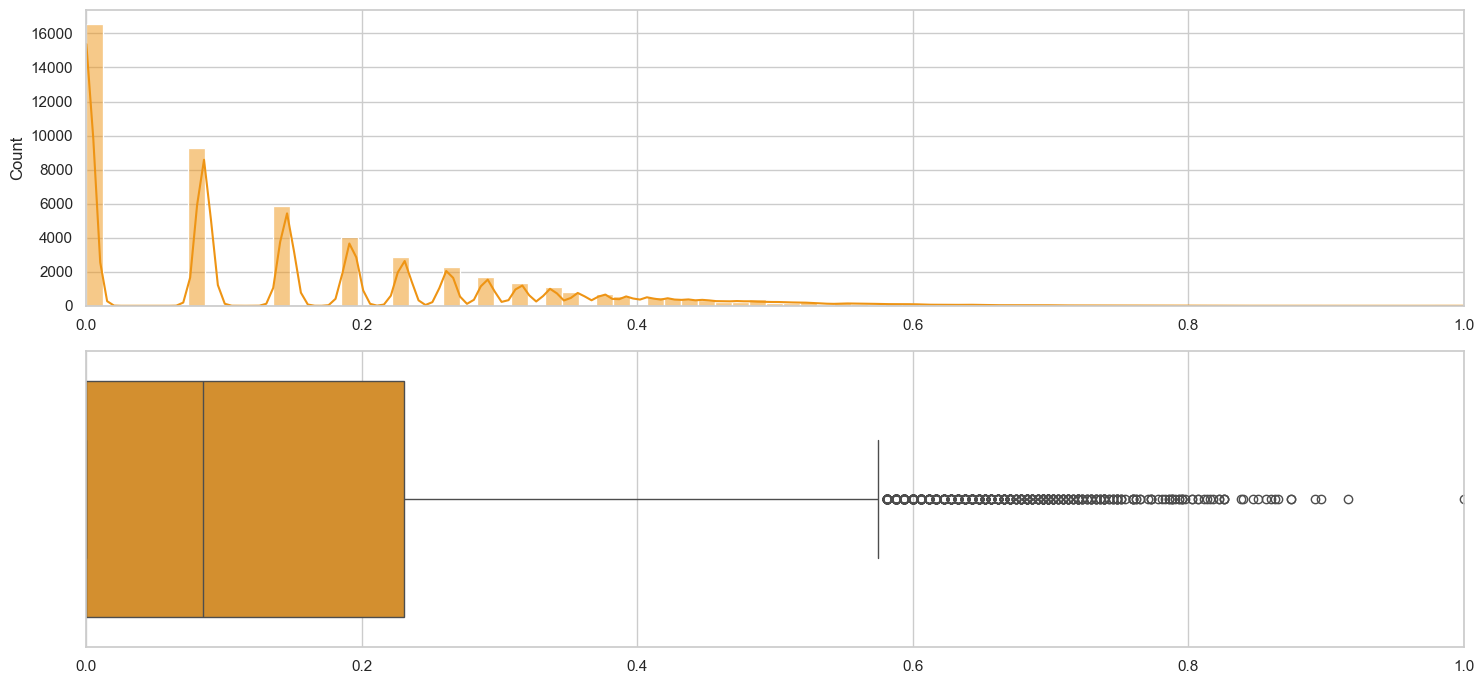

**TOT_CLOSED_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.16
Std.dev: 0.16

Histograma y Boxplot de Tot_Closed_TL.


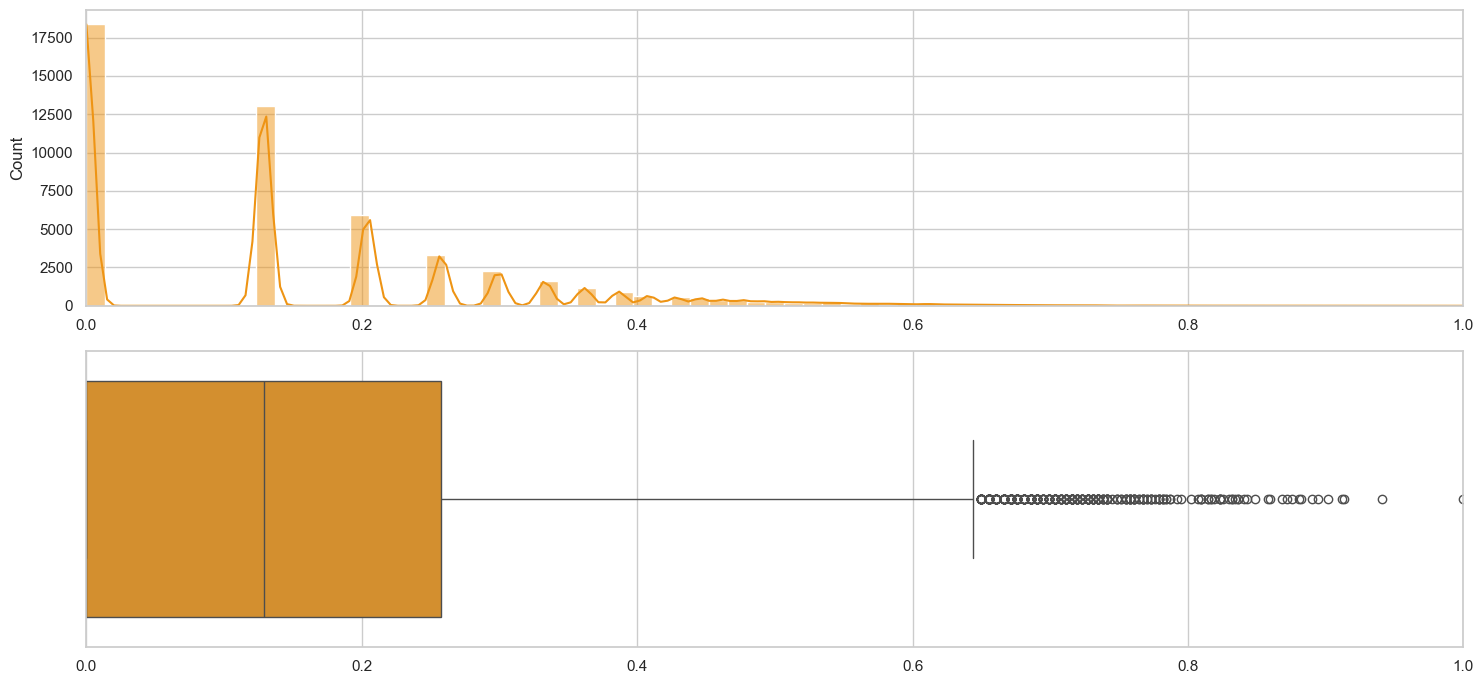

**TOT_ACTIVE_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.24
Std.dev: 0.16

Histograma y Boxplot de Tot_Active_TL.


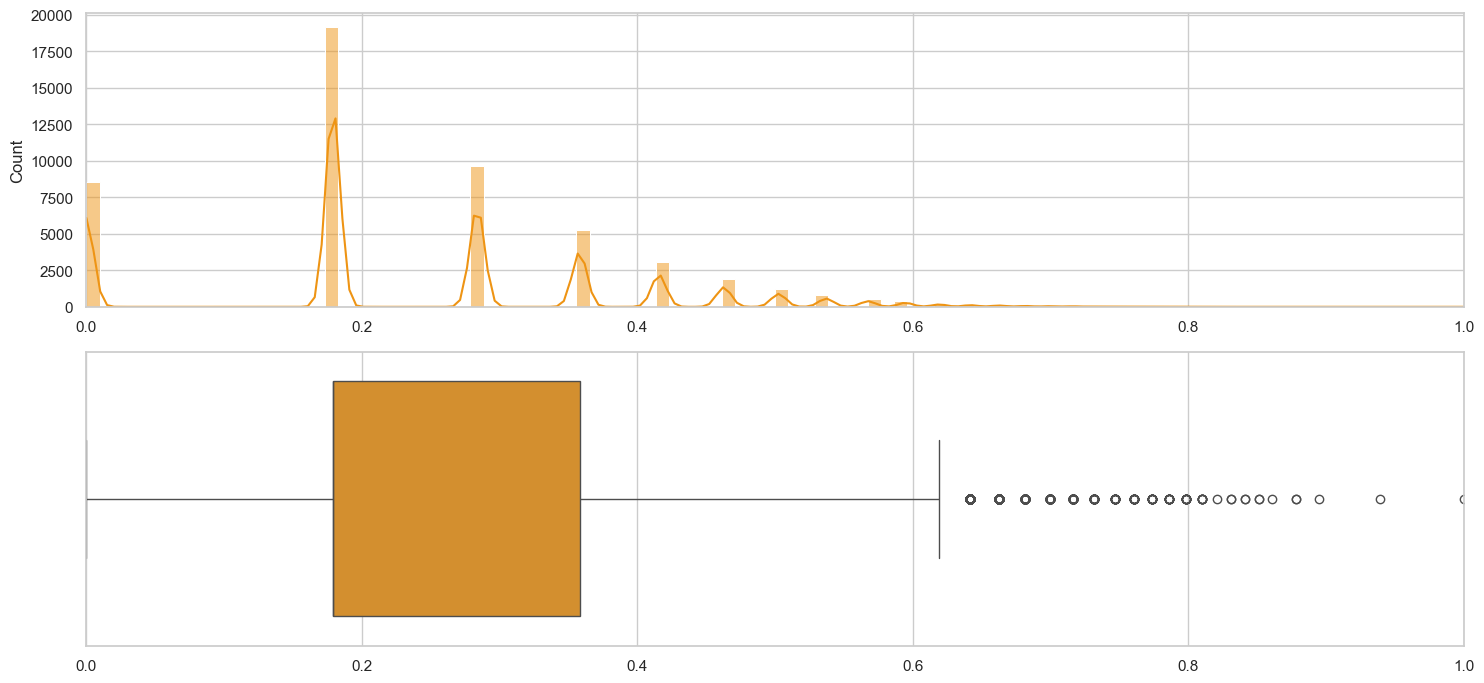

**PCT_ACTIVE_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.57
Std.dev: 0.38

Histograma y Boxplot de pct_active_tl.


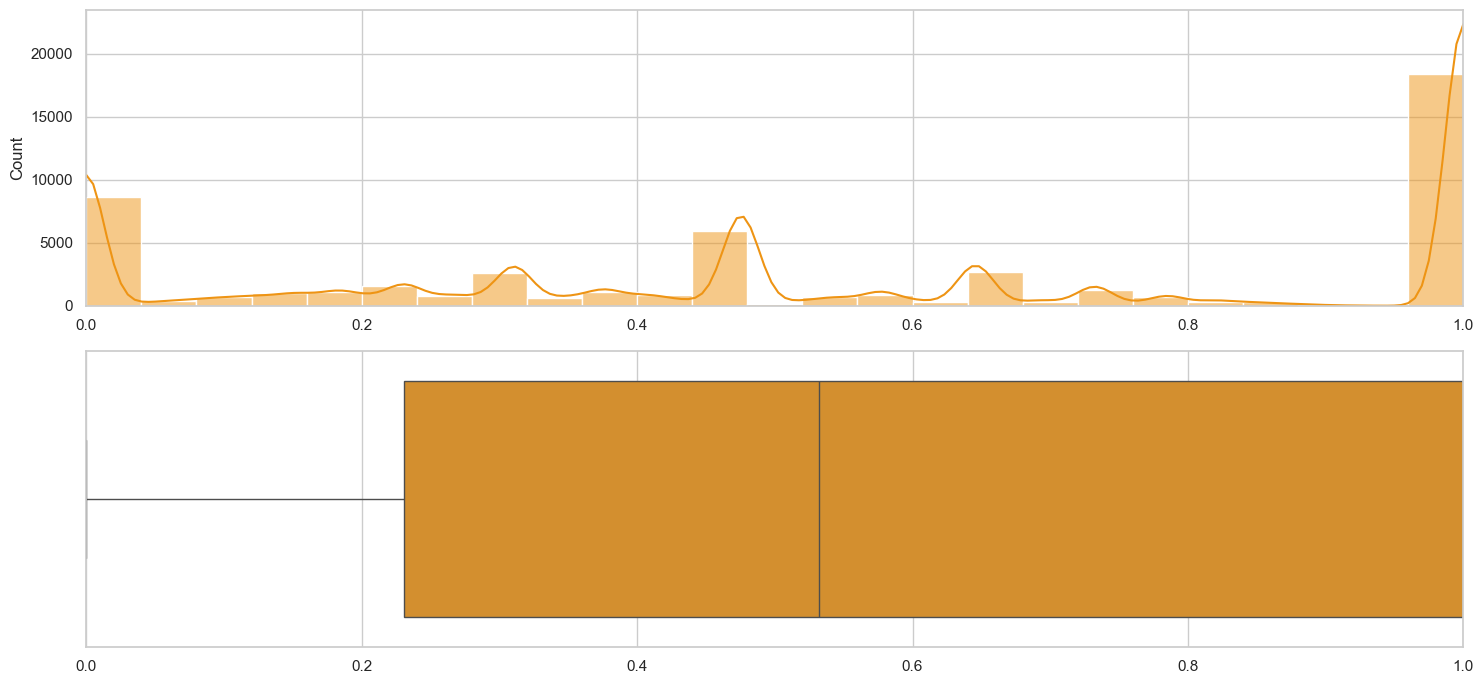

**PCT_CLOSED_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.46
Std.dev: 0.39

Histograma y Boxplot de pct_closed_tl.


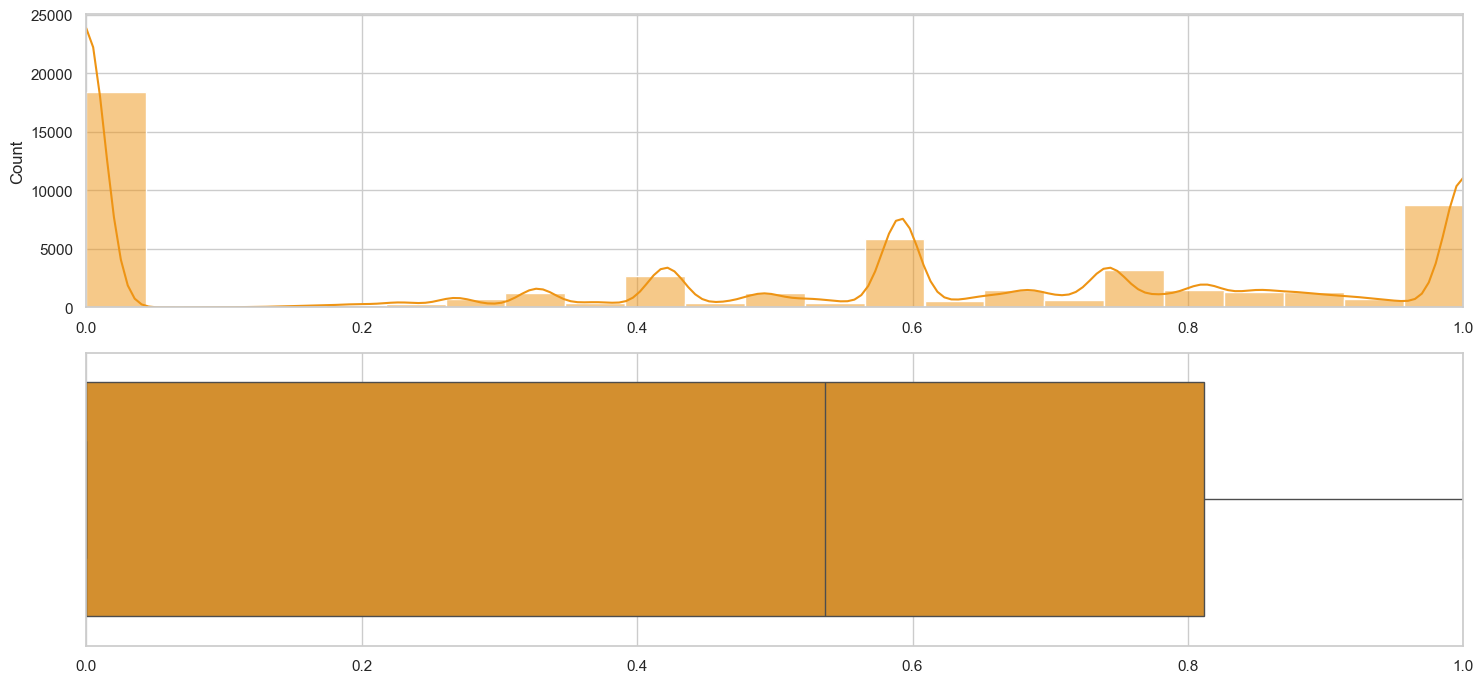

**TOT_MISSED_PMNT**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.08
Std.dev: 0.13

Histograma y Boxplot de Tot_Missed_Pmnt.


**AUTO_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.11
Std.dev: 0.13

Histograma y Boxplot de Auto_TL.


**CC_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.02
Std.dev: 0.07

Histograma y Boxplot de CC_TL.


**CONSUMER_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.13
Std.dev: 0.17

Histograma y Boxplot de Consumer_TL.


**GOLD_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.08
Std.dev: 0.14

Histograma y Boxplot de Gold_TL.


**HOME_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.02
Std.dev: 0.08

Histograma y Boxplot de Home_TL.


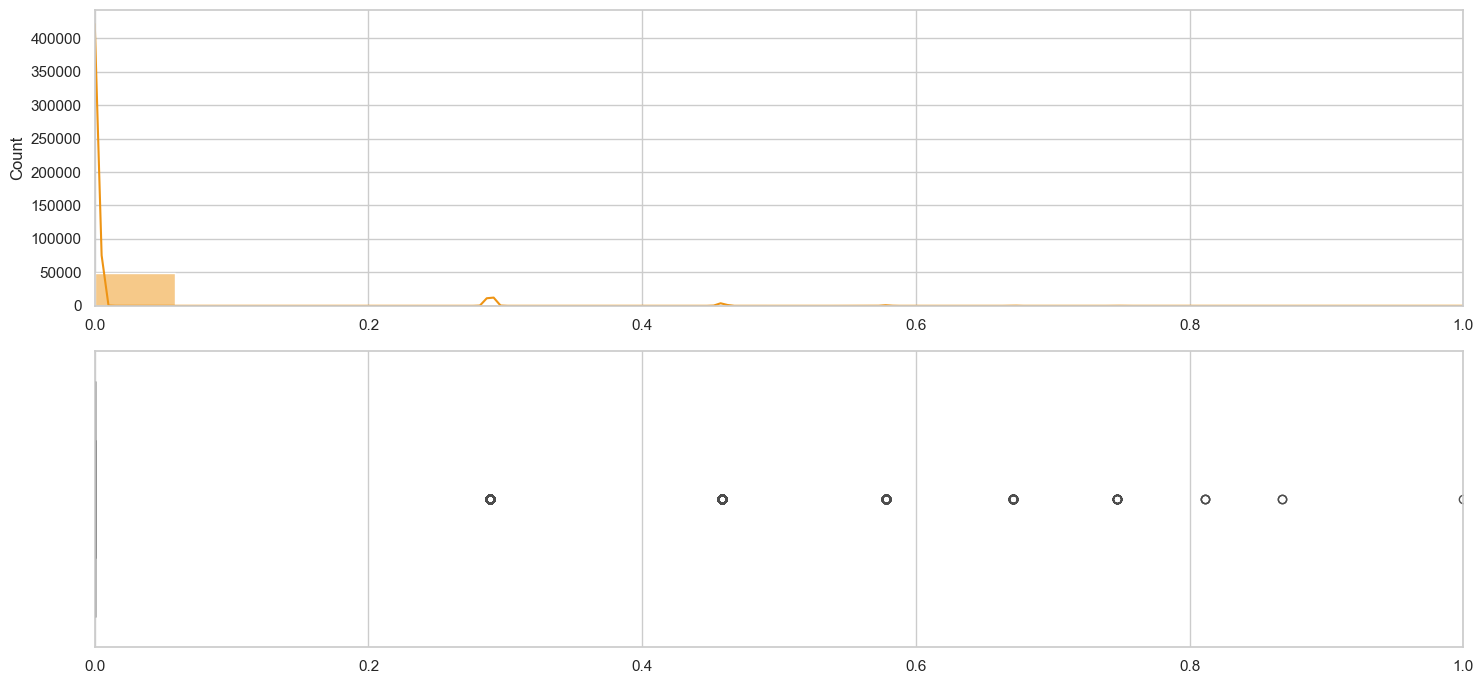

**PL_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.04
Std.dev: 0.11

Histograma y Boxplot de PL_TL.


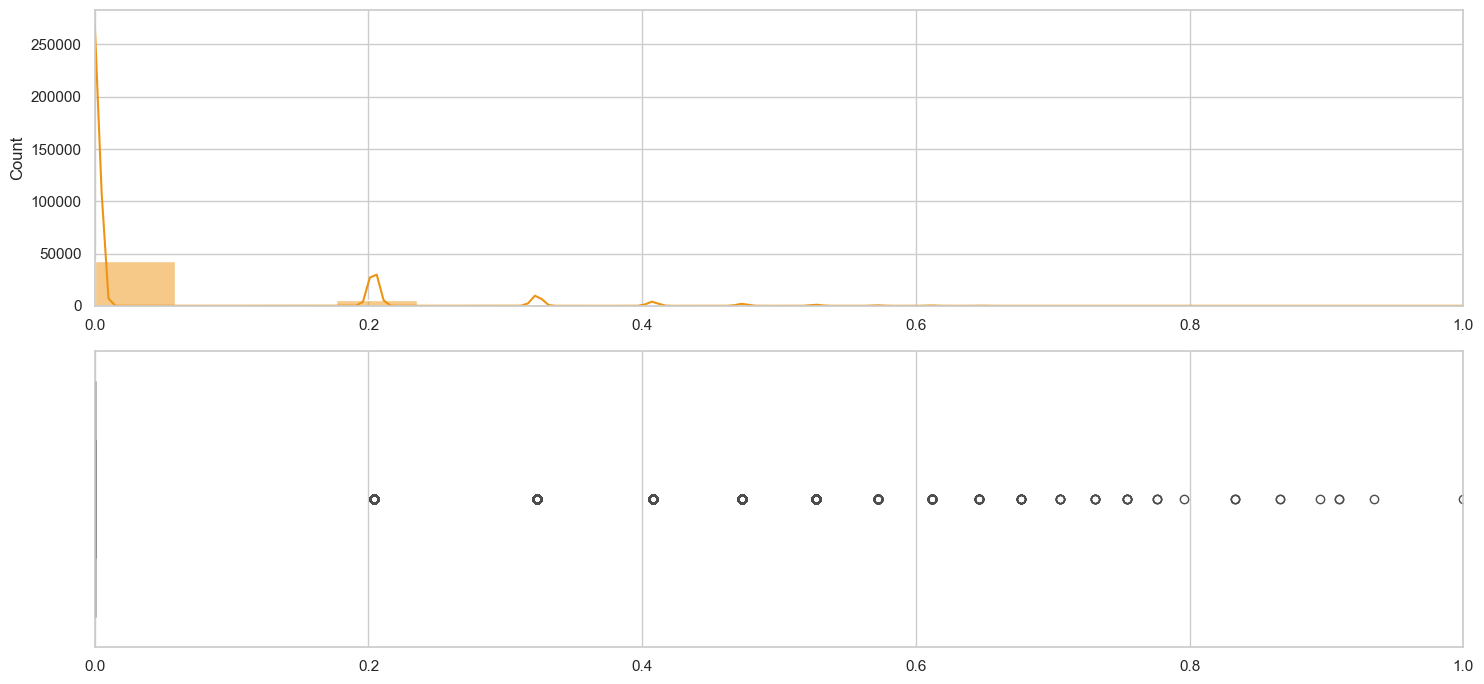

**SECURED_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.16
Std.dev: 0.15

Histograma y Boxplot de Secured_TL.


**UNSECURED_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.19
Std.dev: 0.18

Histograma y Boxplot de Unsecured_TL.


**OTHER_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.11
Std.dev: 0.14

Histograma y Boxplot de Other_TL.


**AGE_OLDEST_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.57
Std.dev: 0.16

Histograma y Boxplot de Age_Oldest_TL.


**AGE_NEWEST_TL**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.39
Std.dev: 0.16

Histograma y Boxplot de Age_Newest_TL.


**TOTAL_TL_OPENED_PCA**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.28
Std.dev: 0.24

Histograma y Boxplot de Total_TL_opened_pca.


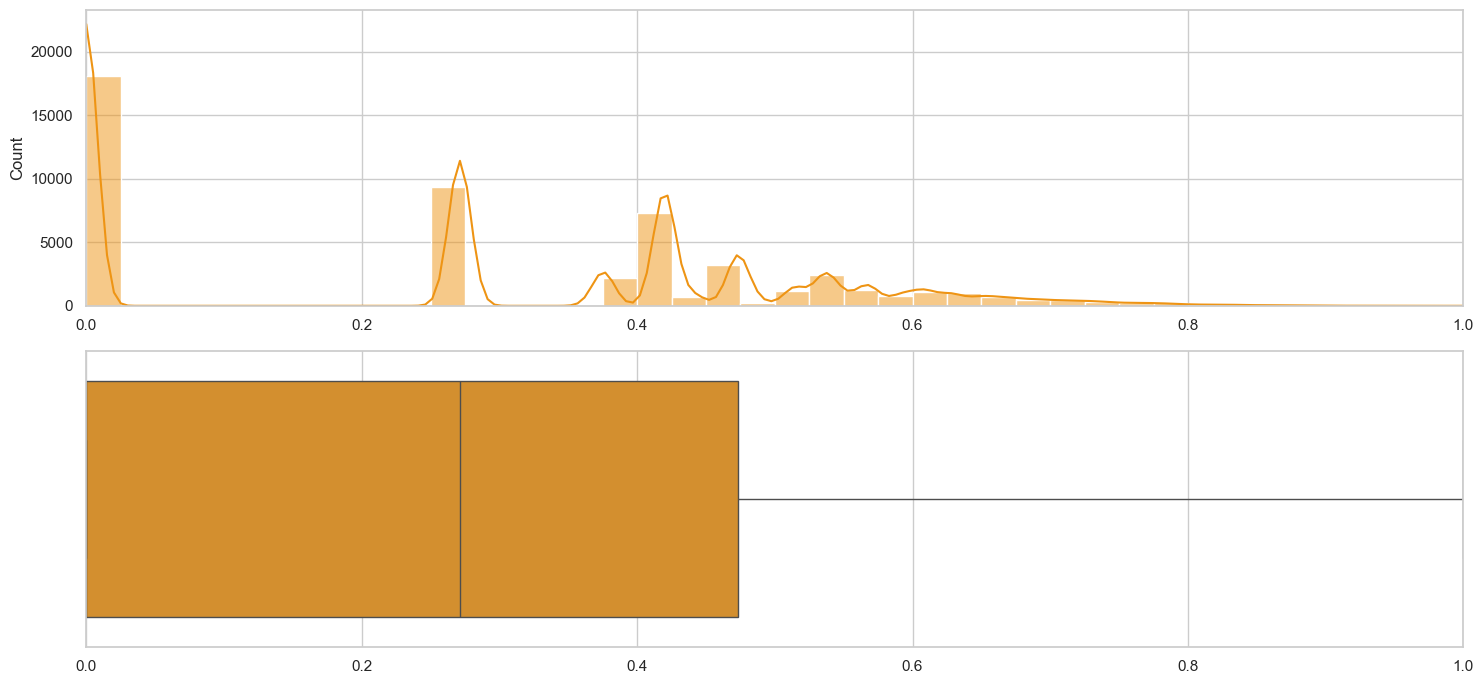

**TOT_TL_CLOSED_PCA**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.13
Std.dev: 0.19

Histograma y Boxplot de Tot_TL_closed_pca.


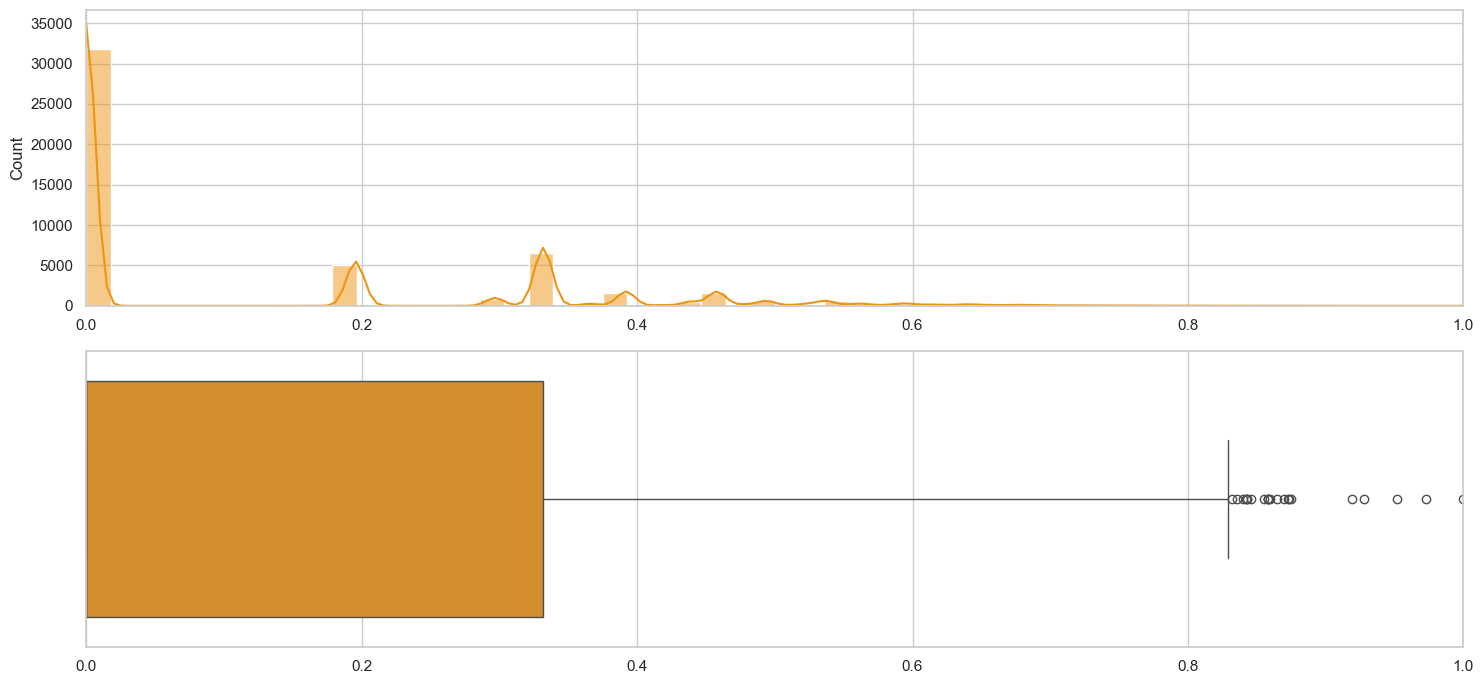

**PCT_TL_OPEN_PCA**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.38
Std.dev: 0.35

Histograma y Boxplot de pct_tl_open_pca.


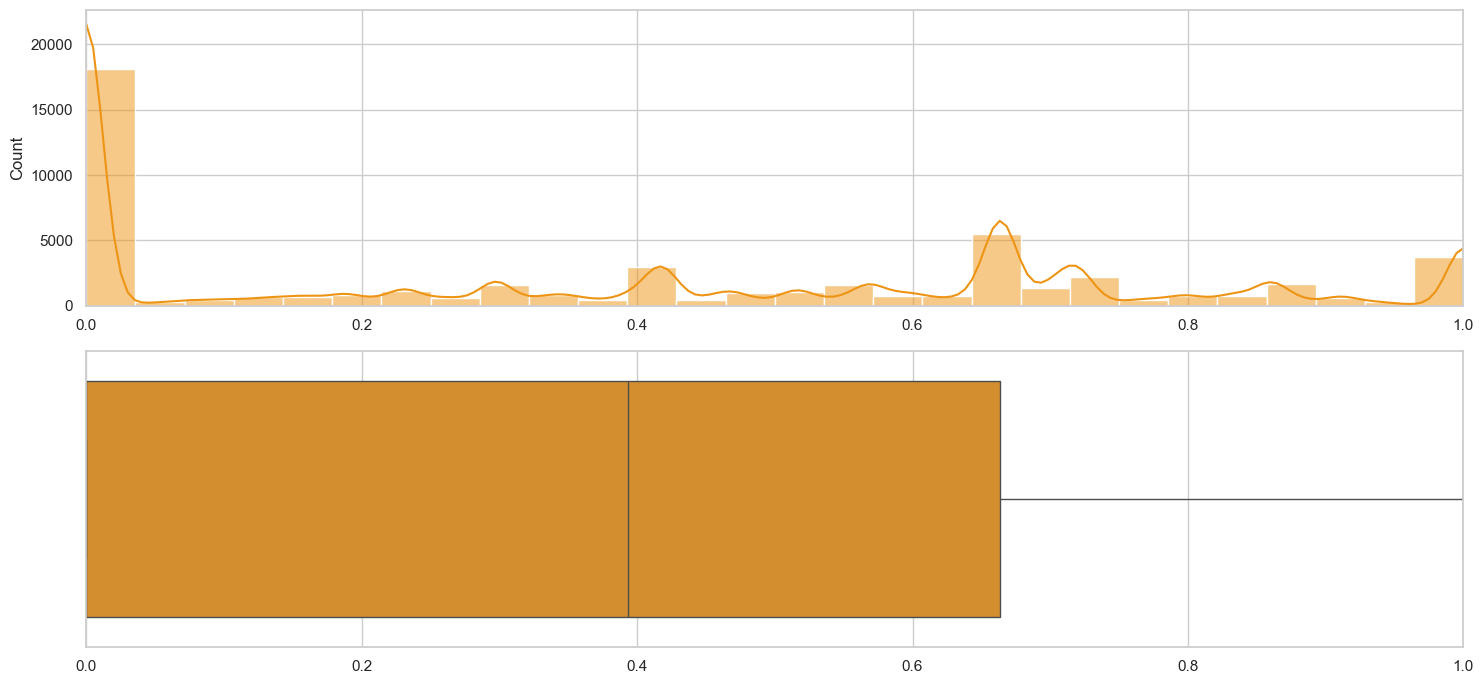

**PCT_TL_CLOSED_PCA**

Estadísticos

Mínimo: 0.0
Máximo: 1.0
Promedio: 0.22
Std.dev: 0.31

Histograma y Boxplot de pct_tl_closed_pca.


In [17]:
# Itera sobre las varáibles numericas para aplicar la función
for v_num in numeric_features:
    Count_Quant(internal, v_num)

**Resumen de Insights Clave**


• **Total_TL**: La distribución bimodal sugiere la presencia de dos grupos distintos, diferenciados por su comportamiento en cuanto a la variable.

• **Tot_Closed_TL**: La gran cantidad de valores atípicos por encima de 0.6 sugiere la presencia de eventos o individuos con características muy diferentes al resto de la población.

• **Tot_Active_TL**: El sesgo positivo general indica que hay valores inusualmente altos de que están afectando el promedio.

• **pct_active_tl**: La multimodalidad sugiere que hay varios grupos distintos dentro de los datos, cada uno con un comportamiento característico respecto a la variable.

• **pct_closed_tl**: El rango amplio de valores (de 0.0 a 1.0) indica que hay una gran variabilidad en los niveles de cierre o finalización entre los diferentes individuos o entidades.

• **Tot_Missed_Pmnt**: La presencia de numerosos valores atípicos por encima de 0.4 indica que hay un subgrupo de casos con un porcentaje de pagos perdidos considerablemente alto.

• **Auto_TL**: La baja variabilidad en el grupo principal sugiere que la mayoría de los datos se concentran alrededor del valor 0.0.

• **CC_TL**: La gran mayoría de los casos tienen un valor de 0.0, lo que indica que la gran mayoría de las personas no tienen una línea de crédito de tarjeta de crédito.

• **Consumer_TL**: La presencia de numerosos valores atípicos por encima de 0.4 indica que hay un subgrupo de casos con un valor considerablemente alto.

• **Gold_TL**: La baja variabilidad en el grupo principal sugiere que la mayoría de los datos se concentran alrededor del valor 0.0.

• **Home_TL**: La gran mayoría de los casos tienen un valor de 0.0, lo que indica que la gran mayoría de las personas no tienen una línea de crédito para vivienda.

• **PL_TL**: La gran mayoría de los casos tienen un valor de 0.0, lo que indica que la gran mayoría de las personas no tienen una línea de crédito personal.

• **Secured_TL**: La presencia de numerosos valores atípicos por encima de 0.4 indica que hay un subgrupo de casos con un valor considerablemente alto.

• **Unsecured_TL**: La baja variabilidad en el grupo principal sugiere que la mayoría de los datos se concentran alrededor del valor 0.0.

• **Other_TL**: La presencia de numerosos valores atípicos por encima de 0.4 indica que hay un subgrupo de casos con un valor de considerablemente alto.

• **Age_Oldest_TL**: Poca presencia de valores atípios, acompañada de una distribución similar a una normal.

• **Age_Newest_TL**: La gran cantidad de valores atípicos por encima de 0.8 sugiere la presencia de eventos o individuos con características muy diferentes al resto de la población.

• **Total_TL_opened_L6M**: Alta presencia de valores cercanos a 0 y sin presencia de valores atípicos.

• **Tot_TL_closed_L6M**: La baja variabilidad en el grupo principal sugiere que la mayoría de los datos se concentran alrededor del valor 0.0.

• **pct_tl_open_L6M**: La distribución multimodal sugiere que hay varios grupos distintos dentro de los datos, cada uno con un comportamiento característico y predominio de valores cercanos a 0.

• **pct_tl_closed_L6M**: La distribución multimodal sugiere que hay varios grupos distintos dentro de los datos, cada uno con un comportamiento característico y predominio de valores cercanos a 0.

## 4. Análisis Bivariante

### 4.1. Estudio de las correlaciones

Para el análisis de las correlaciones, emplearemos dos métodos distintos. En primer lugar, utilizaremos la correlación de Pearson, que nos permitirá identificar las relaciones lineales entre las variables. Posteriormente, recurriremos al método de Spearman, el cual es más adecuado para detectar relaciones no lineales. Con el fin de controlar las posibles multicolinealidades, aplicaremos un filtro moderado, estableciendo un umbral de 0.85, para evitar la presencia de correlaciones excesivas que puedan distorsionar los resultados del modelo.

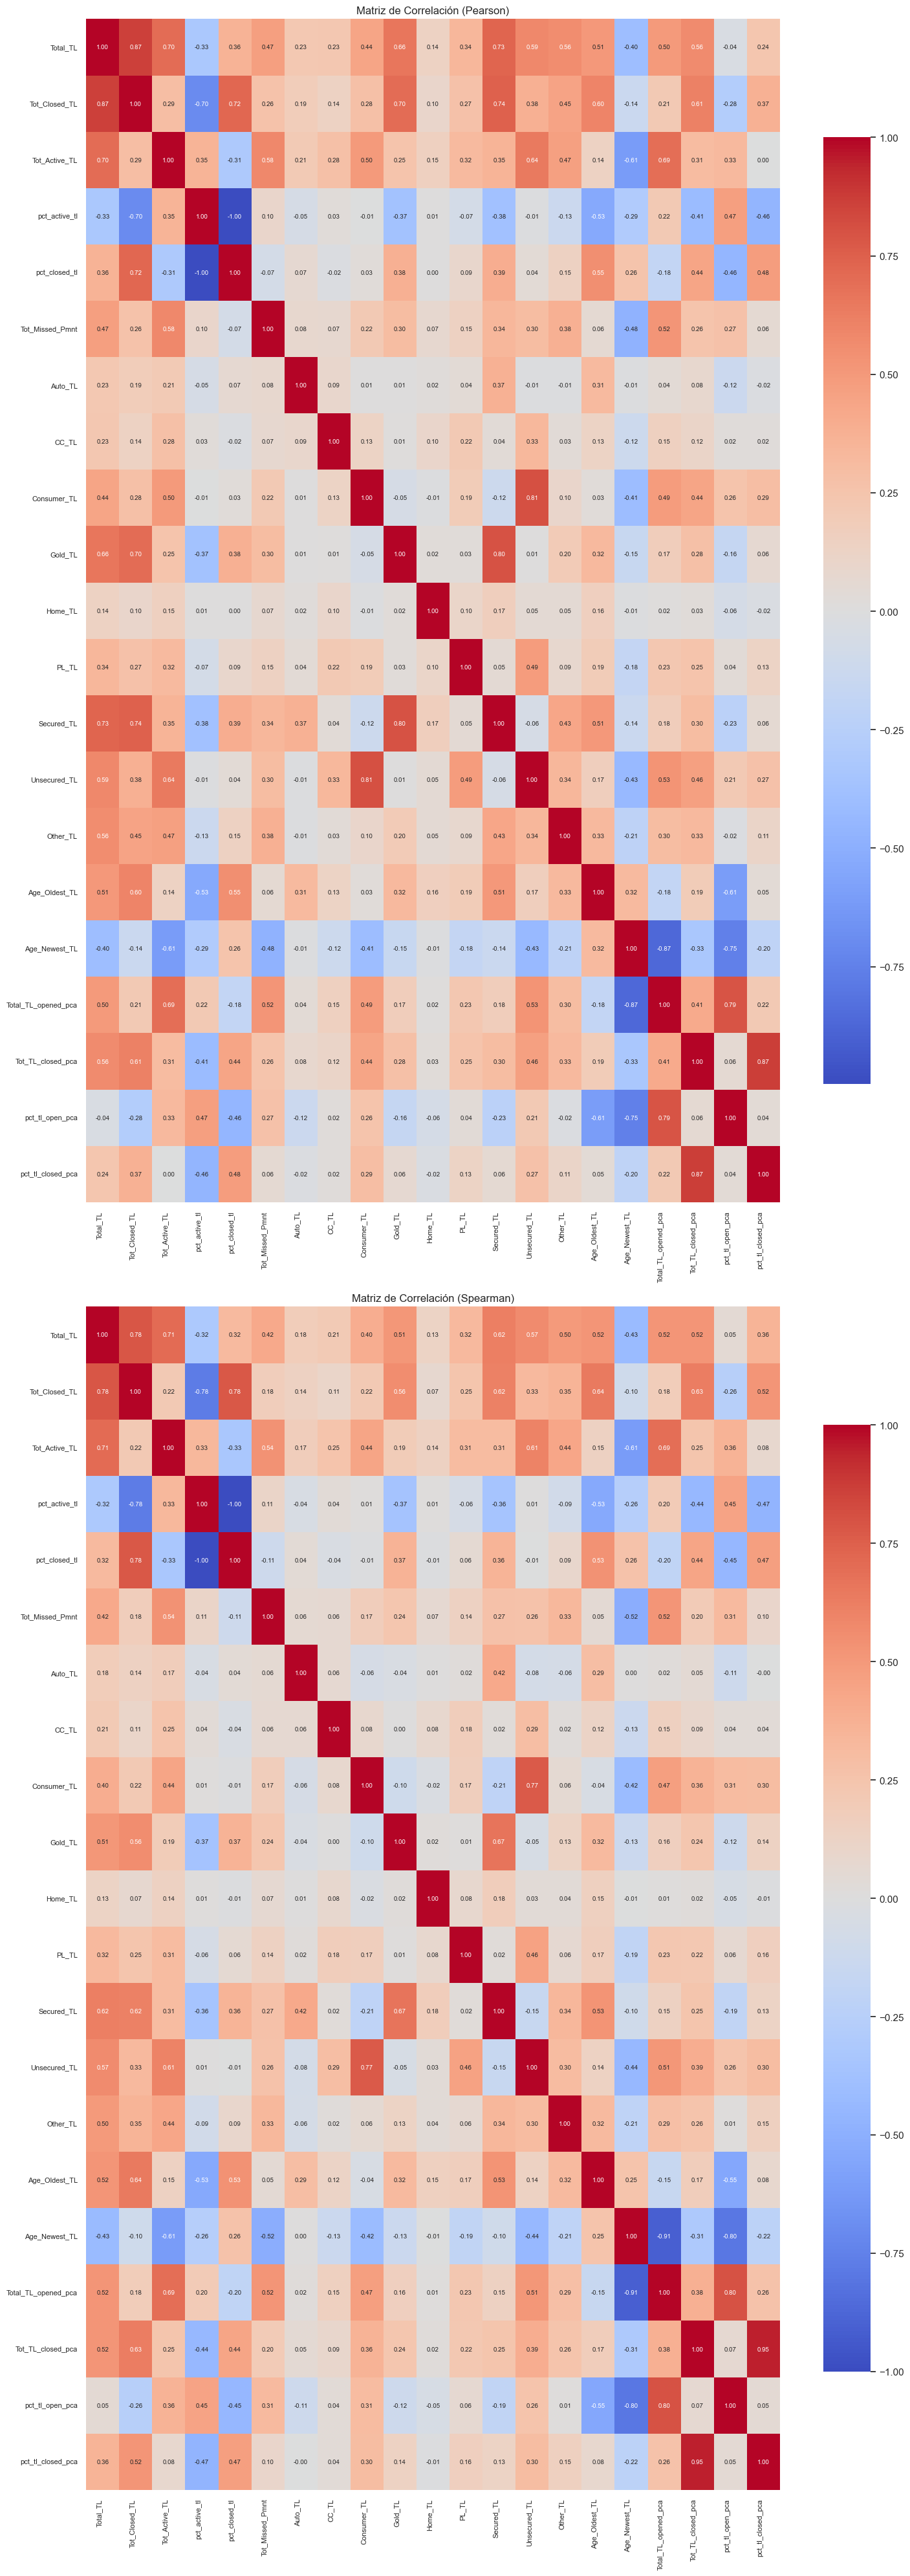

In [18]:
# Lista de métodos de correlación
methods = ['pearson', 'spearman']

# Configuración de la figura: 3 filas, 1 columna
fig, axes = plt.subplots(2, 1, figsize=(15, 40), sharey=True)

# Iterar sobre los métodos y generar las matrices de correlación
for i, method in enumerate(methods):
    # Calcular la matriz de correlación
    correlation_matrix = internal[numeric_features].corr(method=method)
    
    # Crear el heatmap
    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        cmap='coolwarm', 
        fmt='.2f', 
        ax=axes[i], 
        annot_kws={'size': 7}, 
        cbar_kws={'shrink': 0.8} 
    )
    
    # Personalizar etiquetas de los ejes
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=8)
    axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0, fontsize=8)
    axes[i].set_title(f'Matriz de Correlación ({method.capitalize()})', fontsize=12)

# Ajustar el diseño general de la figura
plt.tight_layout()

# Mostrar la figura
plt.show()

In [19]:
# Definir el umbral de correlación y lista de métodos
threshold = 0.79
methods = ['pearson', 'spearman']

# Crear una máscara de correlaciones combinadas
correlation_matrix = np.zeros((len(numeric_features), len(numeric_features)))

for met in methods:
    corr_mat = internal[numeric_features].corr(method=met).abs()
    correlation_matrix = np.maximum(correlation_matrix, corr_mat)

# Crear DataFrame de la matriz combinada
correlation_df = pd.DataFrame(correlation_matrix, index=numeric_features, columns=numeric_features)

# Identificar y eliminar columnas con alta correlación
columns_to_drop = set()
while True:
    # Encontrar la variable con más correlaciones altas
    high_corr = (correlation_df > threshold) & (correlation_df != 1.0)
    high_corr_sum = high_corr.sum().sort_values(ascending=False)

    if high_corr_sum.max() == 0:
        break

    # Eliminar la variable más problemática (con más correlaciones altas)
    col_to_remove = high_corr_sum.idxmax()
    columns_to_drop.add(col_to_remove)
    
    # Eliminar la columna y fila de la matriz de correlación
    correlation_df.drop(index=col_to_remove, columns=col_to_remove, inplace=True)

print(f'Tamaño original: {internal.shape}')
print(f'Columnas a eliminar: {columns_to_drop}')

# Eliminar columnas en el DataFrame
internal = internal.drop(columns=columns_to_drop)

print(f'Tamaño después de filtrar: {internal.shape}')

Tamaño original: (51336, 23)
Columnas a eliminar: {'Total_TL_opened_pca', 'Consumer_TL', 'pct_tl_closed_pca', 'Gold_TL', 'Age_Newest_TL', 'Total_TL'}
Tamaño después de filtrar: (51336, 17)


### 4.2. Target VS Variables Independientes

In [20]:
# Volvemos a crear la variable que recoge las características numéricas
numeric_features = internal.drop(['PROSPECTID', 'Credit_Score'], axis=1).columns

Análisis de variables numéricas respecto a la columna objetivo 'Credit_Score':



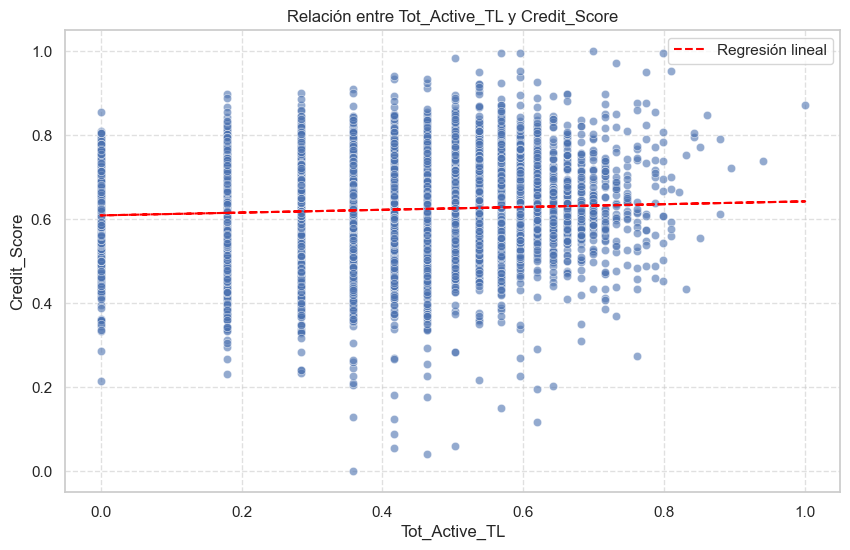

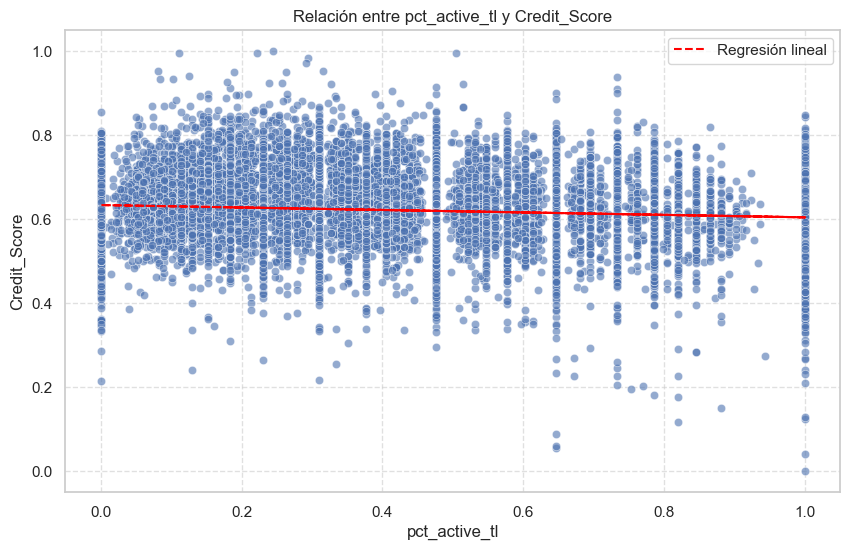

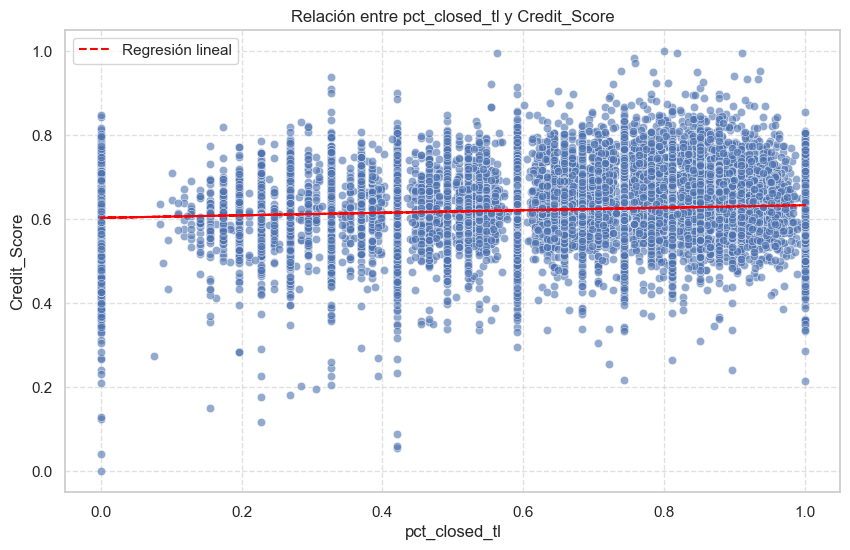

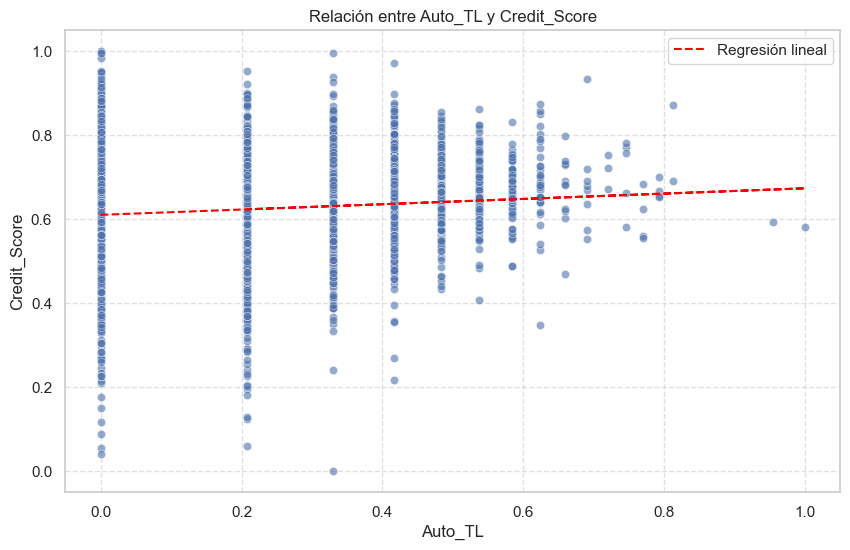

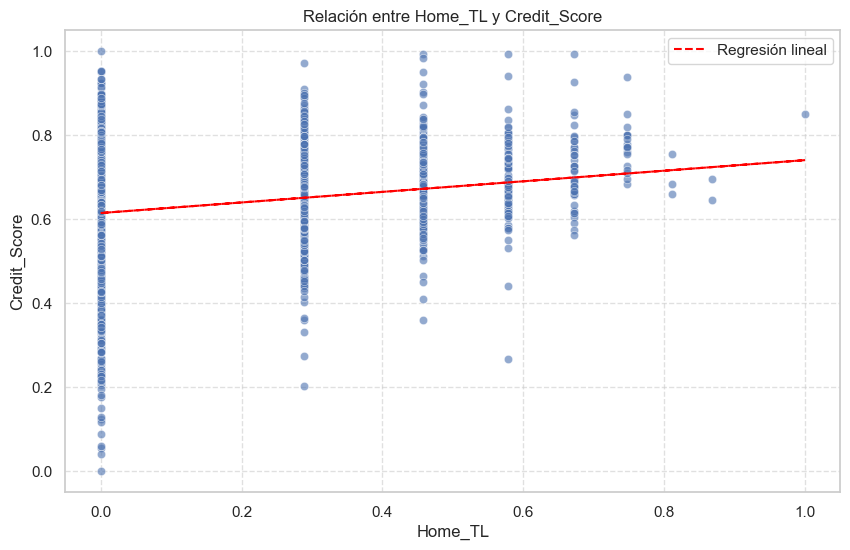

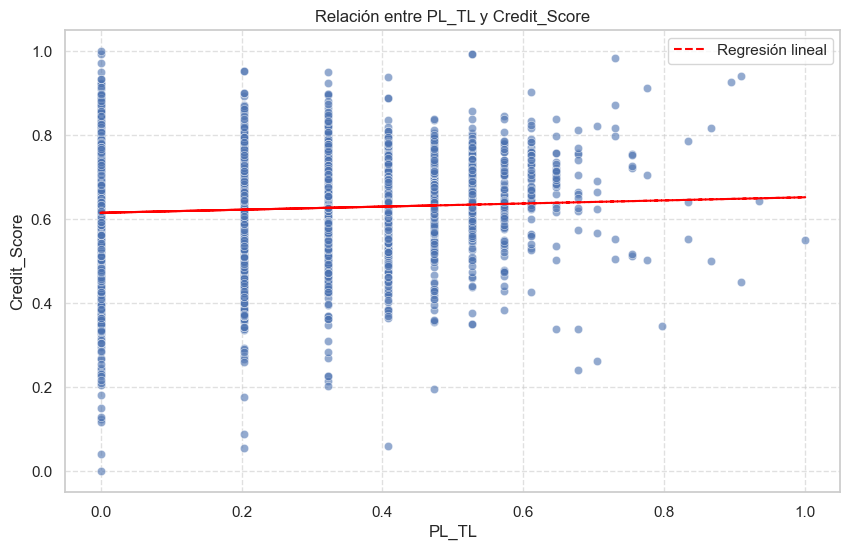

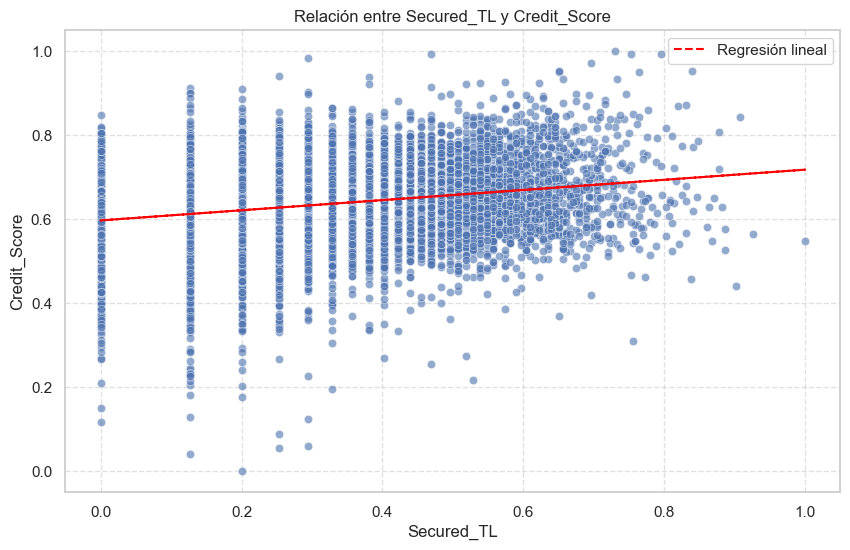

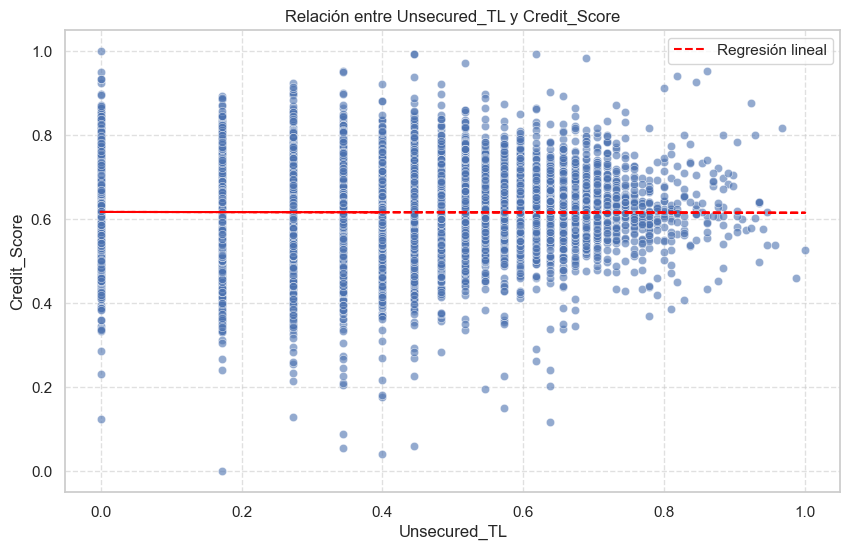

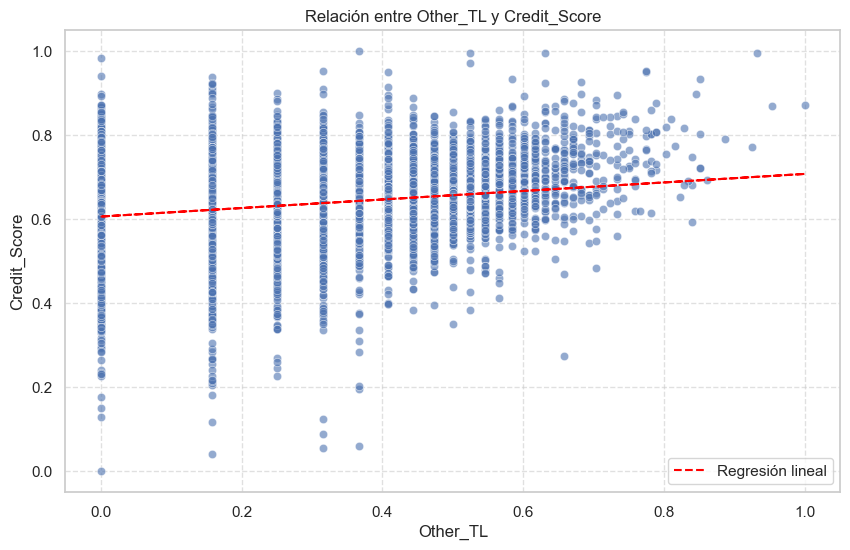

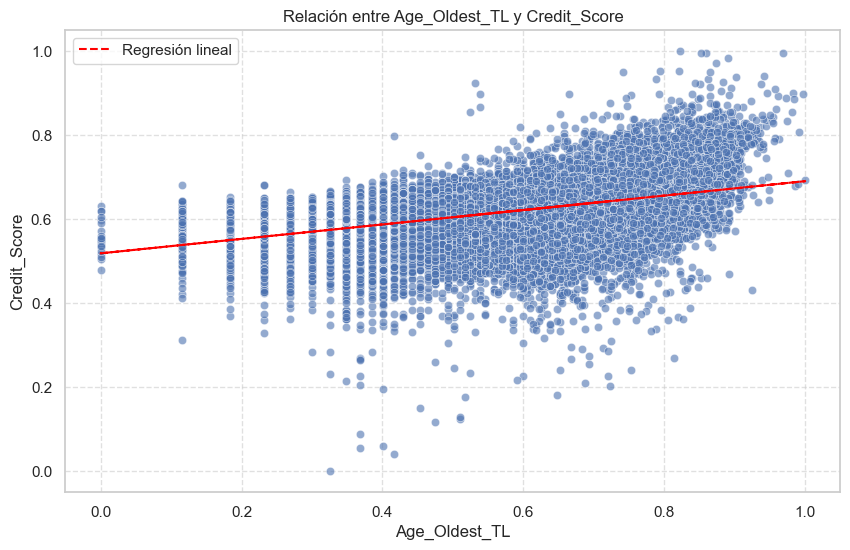

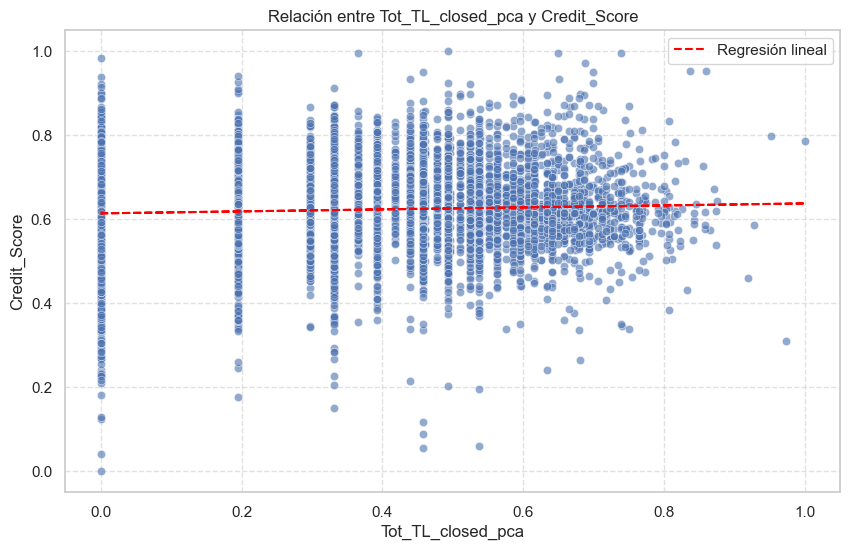

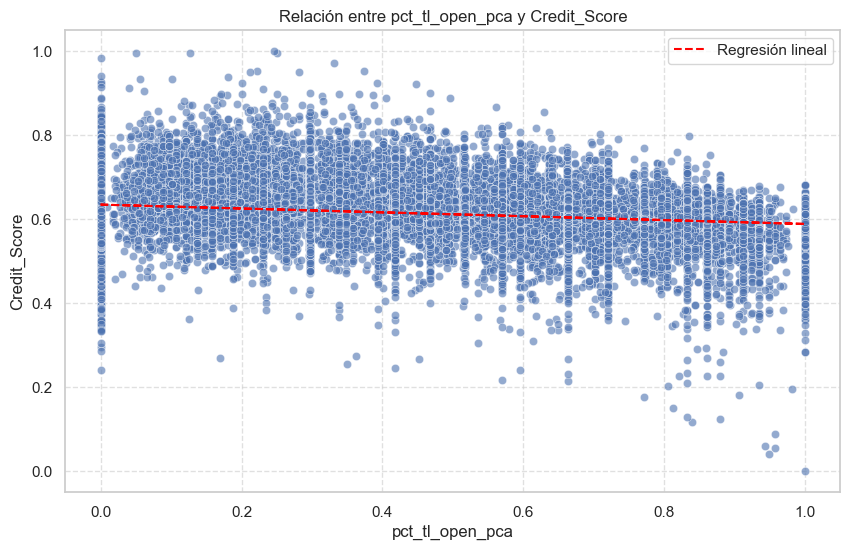

In [21]:
# Llamamos la función que analiza las variables numéricas frente a la target
Analyze_Numeric_Features_Scatter(internal, numeric_features, 'Credit_Score')

**Resumen de Insights Clave**

* **Tot_Closed_TL & Credit_Score:** La mayoría de los puntos se concentran en la parte superior, indicando que la mayoría de las personas tienen un puntaje de crédito alto independientemente del número de líneas de crédito cerradas. La relación entre ambas variables es débil, sugiriendo que otros factores influyen más en el puntaje.

* **Tot_Active_TL & Credit_Score:** Similar al anterior, la mayoría de los puntos se encuentran en la parte superior, con una ligera tendencia positiva. La relación es débil, lo que indica que otros factores son más importantes para el puntaje de crédito.

* **pct_active_tl & Credit_Score:** Los puntos se distribuyen uniformemente a lo largo del eje X, sin una relación clara entre el porcentaje de líneas activas y el puntaje. La mayoría de los puntos se encuentran en la parte superior, lo que sugiere que la mayoría de las personas tienen un puntaje alto independientemente del porcentaje de líneas activas.

* **pct_closed_tl & Credit_Score:** Similar al anterior, los puntos se distribuyen uniformemente sin una relación clara. La mayoría de los puntos se encuentran en la parte superior, lo que sugiere que la mayoría de las personas tienen un puntaje alto independientemente del porcentaje de líneas cerradas.

* **Tot_Missed_Pmnt & Credit_Score:** Los puntos se concentran en la parte inferior izquierda, indicando que la mayoría tienen pocos pagos atrasados y puntajes altos. Se observa una ligera tendencia negativa, sugiriendo que a medida que aumentan los pagos atrasados, el puntaje tiende a disminuir.

* **Auto_TL & Credit_Score:** Similar a "Tot_Active_TL", los puntos se concentran en la parte superior con una ligera tendencia positiva. La relación es débil, sugiriendo que otros factores influyen más en el puntaje.

* **CC_TL & Credit_Score:** Similar a "Tot_Active_TL", los puntos se concentran en la parte superior con una ligera tendencia positiva. La relación es débil, sugiriendo que otros factores influyen más en el puntaje.

* **Home_TL & Credit_Score:** Similar a "Tot_Active_TL", los puntos se concentran en la parte superior con una ligera tendencia positiva. La relación es débil, sugiriendo que otros factores influyen más en el puntaje.

* **PL_TL & Credit_Score:** Similar a "Tot_Active_TL", los puntos se concentran en la parte superior con una ligera tendencia positiva. La relación es débil, sugiriendo que otros factores influyen más en el puntaje.

## 5. Descarga del DataFrame

In [22]:
# Define la ruta de la carpeta donde se guardará el archivo y su nombre
carpeta_destino = "data"
nombre_archivo = "internal_transformed.pkl"

# Construye la ruta completa del archivo combinando la carpeta y el nombre
ruta_completa = os.path.join(carpeta_destino, nombre_archivo)

# Verifica si la carpeta de destino existe. Si no, créala.
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

# Abre el archivo en modo escritura binaria ("wb") y guarda el DataFrame 'internal' en formato pickle.
with open(ruta_completa, "wb") as f:
    pickle.dump(internal, f)

print(f"DataFrame guardado en: {ruta_completa}")

DataFrame guardado en: data\internal_transformed.pkl
